In [18]:
import numpy as np

num_rows = 4
num_cols = 4
num_states = num_rows * num_cols
num_actions = 4
num_episodes = 500
alpha = 0.6
gamma = 0.9

rewards = np.random.randint(1, 10, num_states)
goal_state = num_states - 1
obstacles = [5, 7, 10]

In [19]:
Q_mc_prediction = np.zeros((num_states, num_actions))  # For MC Prediction
Q_first_visit = np.zeros((num_states, num_actions))  # For First Visit MC
Q_every_visit = np.zeros((num_states, num_actions))  # For Every Visit MC

In [20]:
def state_to_coords(state):
    return state // num_cols, state % num_cols

def sample_episode():
    state = np.random.randint(num_states)  # Start from a random state
    episode = []
    while state != goal_state:
        action = np.random.randint(num_actions)  # Choose a random action
        next_state = None
        if action == 0 and state // num_cols > 0:  # Up
            next_state = state - num_cols
        elif action == 1 and state // num_cols < num_rows - 1:  # Down
            next_state = state + num_cols
        elif action == 2 and state % num_cols > 0:  # Left
            next_state = state - 1
        elif action == 3 and state % num_cols < num_cols - 1:  # Right
            next_state = state + 1
        else:
            next_state = state
        episode.append((state, action, rewards[state]))
        state = next_state
    return episode

In [21]:
def update_q_values(Q, episode):
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        Q[state, action] += alpha * (G - Q[state, action])

### **Monte Carlo Sampling for MC Prediction**


In [22]:
for _ in range(num_episodes):
    episode = sample_episode()
    update_q_values(Q_mc_prediction, episode)

### **Monte Carlo Sampling for First Visit MC**


In [23]:
returns_first_visit = {}
for _ in range(num_episodes):
    episode = sample_episode()
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        if (state, action) not in [(s, a) for s, a, _ in episode[:t]]:
            if (state, action) not in returns_first_visit:
                returns_first_visit[(state, action)] = []
            returns_first_visit[(state, action)].append(G)
            Q_first_visit[state, action] = np.mean(returns_first_visit[(state, action)])


### **Monte Carlo Sampling for Every Visit MC**

In [24]:
returns_every_visit = {}
for _ in range(num_episodes):
    episode = sample_episode()
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        if (state, action) not in returns_every_visit:
            returns_every_visit[(state, action)] = []
        returns_every_visit[(state, action)].append(G)
        Q_every_visit[state, action] = np.mean(returns_every_visit[(state, action)])

### **Analyzing Q-values for each Monte Carlo method**


In [25]:
print("Q-values for MC Prediction:")
print(Q_mc_prediction)
print("\nQ-values for First Visit MC:")
print(Q_first_visit)
print("\nQ-values for Every Visit MC:")
print(Q_every_visit)

Q-values for MC Prediction:
[[41.31803067 41.38450236 44.41303668 43.11633832]
 [48.88045901 49.62733105 43.74535627 46.81505704]
 [48.71809552 47.74336376 50.20639416 46.61138743]
 [40.62299151 39.22676333 47.2902199  41.59414729]
 [44.69984905 36.1516611  42.92738407 47.67324679]
 [51.98045964 38.68029972 52.73381242 47.16024712]
 [50.12830911 40.17910104 35.48826986 41.97536672]
 [40.27259497 38.27804777 39.41851356 40.90940794]
 [38.28210275 29.60740008 33.78310711 34.11146748]
 [52.75873964 33.73208754 34.67897015 40.17472055]
 [35.75792854 38.0160534  26.0200075  36.23754703]
 [38.39983821  5.         37.20860886 35.25259435]
 [33.91314327 35.78882005 28.55318768 26.78597299]
 [37.49912036 26.7012083  27.68641878 27.15628157]
 [22.11388467 39.0867993  38.28263168  4.        ]
 [ 0.          0.          0.          0.        ]]

Q-values for First Visit MC:
[[46.58375054 45.11859482 46.34182764 46.58438726]
 [46.48568868 46.41383642 46.06968252 43.85903382]
 [44.52769612 40.892251

In [26]:
import matplotlib.pyplot as plt

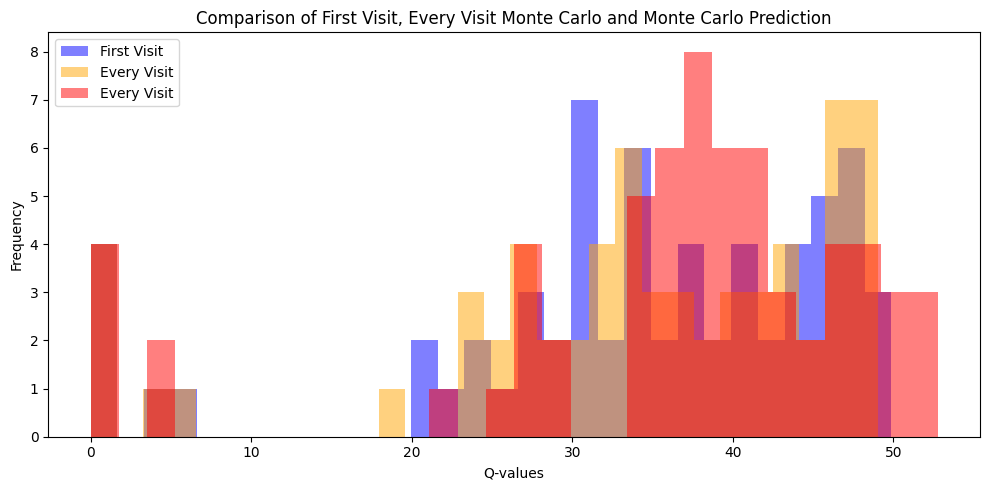

In [27]:
plt.figure(figsize=(10, 5))

plt.hist(Q_first_visit.flatten(), bins=30, alpha=0.5, label='First Visit', color='blue')
plt.hist(Q_every_visit.flatten(), bins=30, alpha=0.5, label='Every Visit', color='orange')
plt.hist(Q_mc_prediction.flatten(), bins=30, alpha=0.5, label='Every Visit', color='red')


plt.xlabel('Q-values')
plt.ylabel('Frequency')
plt.title('Comparison of First Visit, Every Visit Monte Carlo and Monte Carlo Prediction')
plt.legend()

plt.tight_layout()
plt.show()

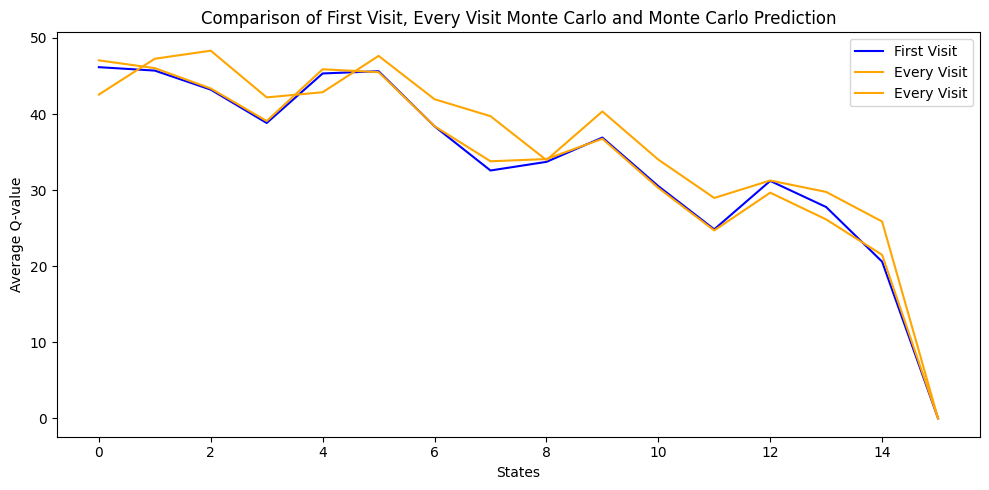

In [28]:
avg_Q_first_visit = np.mean(Q_first_visit, axis=1)
avg_Q_every_visit = np.mean(Q_every_visit, axis=1)
avg_Q_mc_prediction = np.mean(Q_mc_prediction, axis=1)

plt.figure(figsize=(10, 5))

plt.plot(avg_Q_first_visit, label='First Visit', color='blue')
plt.plot(avg_Q_every_visit, label='Every Visit', color='orange')
plt.plot(avg_Q_mc_prediction, label='Every Visit', color='orange')


plt.xlabel('States')
plt.ylabel('Average Q-value')
plt.title('Comparison of First Visit, Every Visit Monte Carlo and Monte Carlo Prediction')
plt.legend()

plt.tight_layout()
plt.show()